# Import library

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [114]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test_syuMjMz.csv')

In [115]:
print(train.shape)
print(test.shape)

(512087, 11)
(36000, 9)


# Data Exploration

In [116]:
print(train.columns)
print('-'*50)
print(test.columns)

Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')
--------------------------------------------------
Index(['ID', 'Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric'],
      dtype='object')


In [117]:
train.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.01,81
1,2,2,1,Development,Course,0,0,1,13650,0.01,79
2,3,3,1,Development,Course,0,0,1,11655,0.01,75
3,4,4,1,Development,Course,0,0,1,12054,0.01,80
4,5,5,1,Development,Course,0,0,1,6804,0.01,41


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [119]:
train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.00,512087.00,512087.00,512087.00,512087.00,512087.00,512087.00,510323.00,512087.00
mean,274007.30,434.92,300.39,0.38,0.03,0.49,15375.10,0.07,120.83
std,158228.83,256.04,173.37,0.49,0.18,0.50,7727.23,0.10,54.36
min,1.00,1.00,1.00,0.00,0.00,0.00,168.00,0.00,0.00
25%,136962.50,214.00,150.00,0.00,0.00,0.00,10584.00,0.01,84.00
50%,273984.00,427.00,300.00,0.00,0.00,0.00,13776.00,0.04,111.00
75%,411065.50,658.00,451.00,1.00,0.00,1.00,18123.00,0.09,146.00
max,548027.00,882.00,600.00,1.00,1.00,1.00,100002.00,0.77,682.00


In [120]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.01
1,884,884,1,Development,Course,1,0,1,0.01
2,885,885,1,Development,Course,1,0,1,0.01
3,886,886,1,Development,Course,1,0,1,0.01
4,887,887,1,Development,Course,0,0,1,0.01


In [121]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36000 non-null  int64  
 1   Day_No              36000 non-null  int64  
 2   Course_ID           36000 non-null  int64  
 3   Course_Domain       36000 non-null  object 
 4   Course_Type         36000 non-null  object 
 5   Short_Promotion     36000 non-null  int64  
 6   Public_Holiday      36000 non-null  int64  
 7   Long_Promotion      36000 non-null  int64  
 8   Competition_Metric  35880 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 2.5+ MB


In [122]:
test.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
count,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,35880.00
mean,274566.03,912.50,300.50,0.40,0.01,0.50,0.07
std,158083.87,17.32,173.21,0.49,0.10,0.50,0.10
min,883.00,883.00,1.00,0.00,0.00,0.00,0.00
25%,137730.25,897.75,150.75,0.00,0.00,0.00,0.01
50%,274761.50,912.50,300.50,0.00,0.00,1.00,0.03
75%,410872.75,927.25,450.25,1.00,0.00,1.00,0.09
max,548087.00,942.00,600.00,1.00,1.00,1.00,0.77


In [123]:
train.fillna(0,inplace=True)

In [124]:
test.fillna(0,inplace=True)

<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

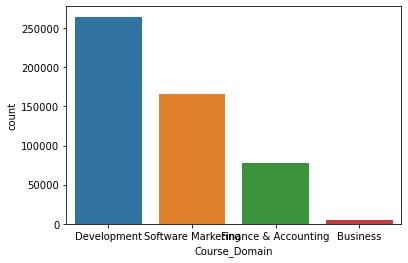

In [125]:
sns.countplot(train['Course_Domain'])

<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

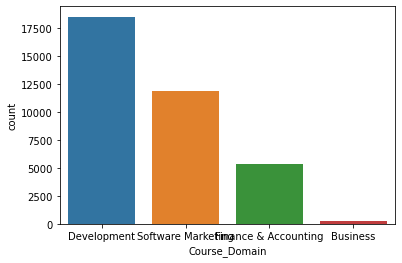

In [126]:
sns.countplot(test['Course_Domain'])

In [127]:
train=pd.get_dummies(train, columns= ['Course_Domain'], drop_first=True)
test=pd.get_dummies(test, columns= ['Course_Domain'], drop_first=True)

<AxesSubplot:xlabel='Course_Type', ylabel='count'>

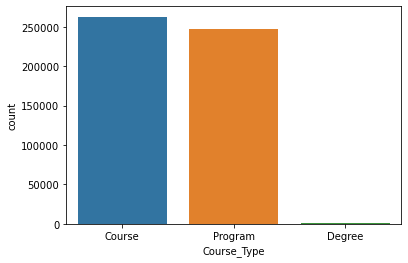

In [128]:
sns.countplot(train['Course_Type'])

<AxesSubplot:xlabel='Course_Type', ylabel='count'>

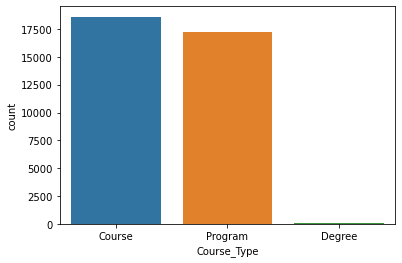

In [129]:
sns.countplot(test['Course_Type'])

In [130]:
train=pd.get_dummies(train, columns= ['Course_Type'], drop_first=True)
test=pd.get_dummies(test, columns= ['Course_Type'], drop_first=True)

In [131]:
train.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,1,1,0,1,1,11004,0.01,81,1,0,0,0,0
1,2,2,1,0,0,1,13650,0.01,79,1,0,0,0,0
2,3,3,1,0,0,1,11655,0.01,75,1,0,0,0,0
3,4,4,1,0,0,1,12054,0.01,80,1,0,0,0,0
4,5,5,1,0,0,1,6804,0.01,41,1,0,0,0,0


<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

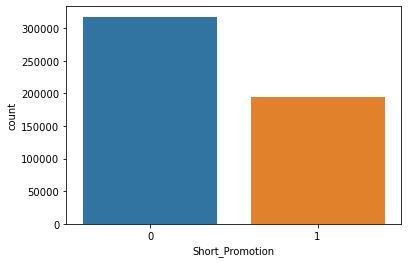

In [132]:
sns.countplot(train['Short_Promotion'])

<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

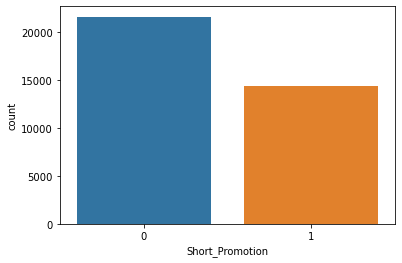

In [133]:
sns.countplot(test['Short_Promotion'])

<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

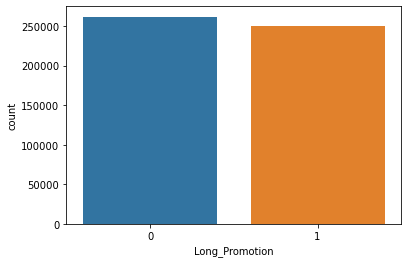

In [134]:
sns.countplot(train['Long_Promotion'])

<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

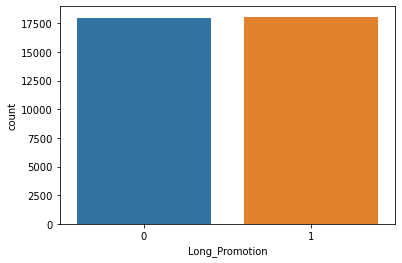

In [135]:
sns.countplot(test['Long_Promotion'])

<AxesSubplot:xlabel='Public_Holiday', ylabel='count'>

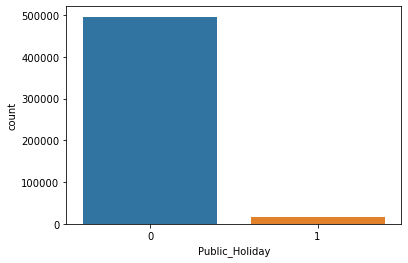

In [136]:
sns.countplot(train['Public_Holiday'])

<AxesSubplot:xlabel='Public_Holiday', ylabel='count'>

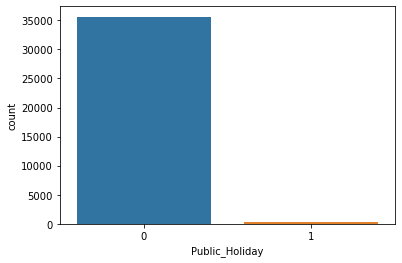

In [137]:
sns.countplot(test['Public_Holiday'])

Visualizsing dependent feature

<AxesSubplot:>

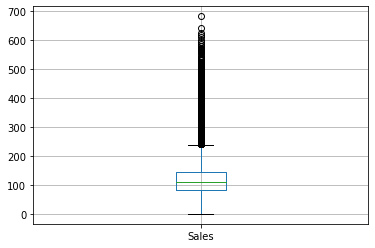

In [138]:
train[['Sales']].boxplot()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

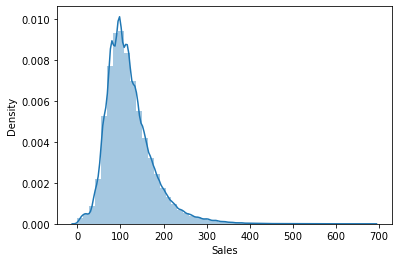

In [139]:
sns.distplot(train['Sales'])

In [140]:
print('Skewness= ',train['Sales'].skew())
print('Kurtosos= ',train['Sales'].kurt())

Skewness=  1.374769816079381
Kurtosos=  3.6095060518605546


In [141]:
train['Day_OF_Week']=train['Day_No']%7

<AxesSubplot:>

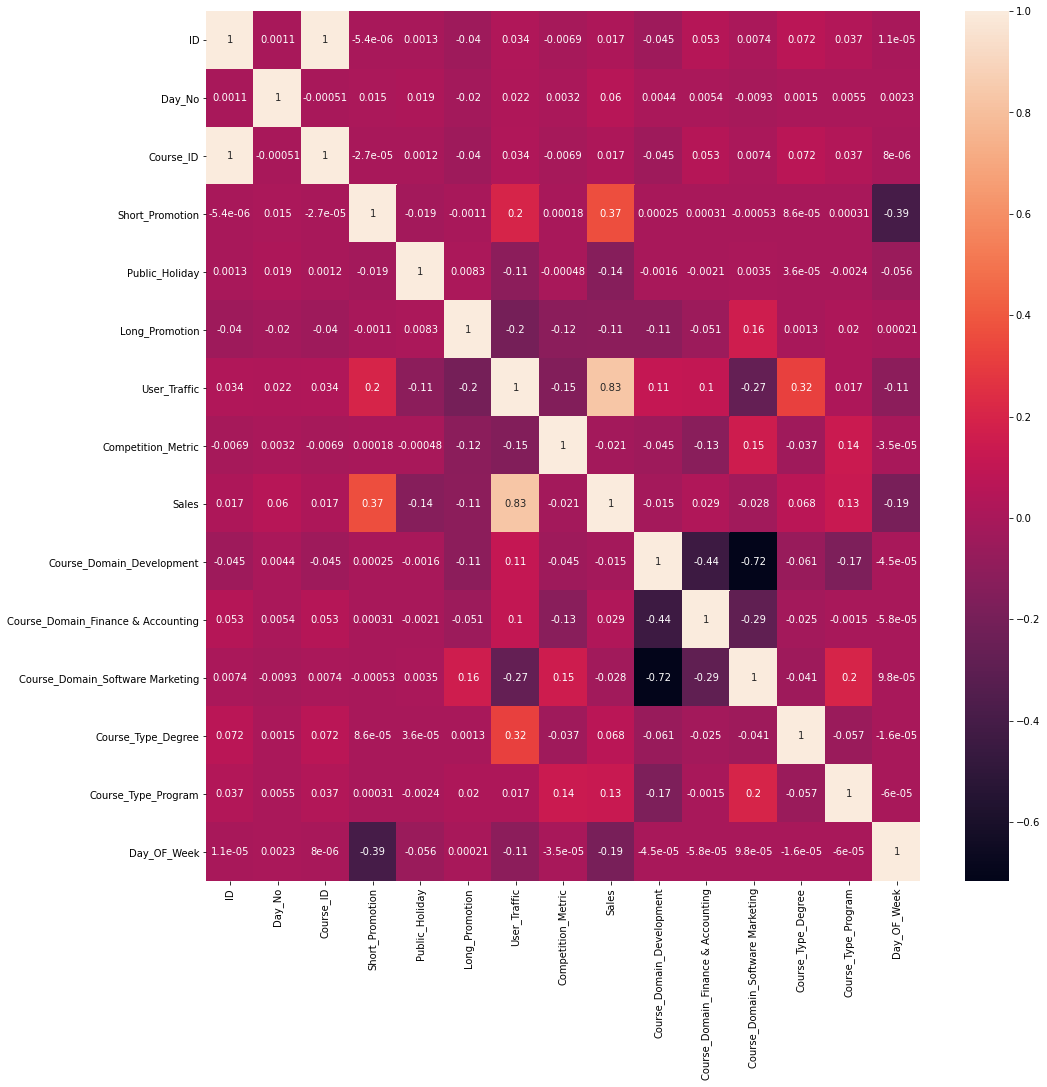

In [142]:
#Plotting correlation using heatmap
plt.subplots(figsize=(16,16))
sns.heatmap(train.corr(),annot=True)

# Dummy Prediction

In [143]:
data=train.copy()

In [144]:
data.drop('User_Traffic',axis=1,inplace=True)

In [145]:
data.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,Day_OF_Week
0,1,1,1,0,1,1,0.01,81,1,0,0,0,0,1
1,2,2,1,0,0,1,0.01,79,1,0,0,0,0,2
2,3,3,1,0,0,1,0.01,75,1,0,0,0,0,3
3,4,4,1,0,0,1,0.01,80,1,0,0,0,0,4
4,5,5,1,0,0,1,0.01,41,1,0,0,0,0,5


In [146]:
y=data['Sales'].iloc[:1000]
data=data.drop('Sales',axis=1)
X=data.iloc[:1000,2:]

In [147]:
y

0       81
1       79
2       75
3       80
4       41
      ... 
995    145
996    131
997    130
998     67
999    125
Name: Sales, Length: 1000, dtype: int64

In [148]:
X.head()

,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,Day_OF_Week
0,1,0,1,1,0.01,1,0,0,0,0,1
1,1,0,0,1,0.01,1,0,0,0,0,2
2,1,0,0,1,0.01,1,0,0,0,0,3
3,1,0,0,1,0.01,1,0,0,0,0,4
4,1,0,0,1,0.01,1,0,0,0,0,5


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [151]:
reg=LazyRegressor(verbose=0,predictions=True)

In [152]:
models,predictions=reg.fit(X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:03<00:00, 10.54it/s]


In [153]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.72       0.74 16.73        0.10
HistGradientBoostingRegressor                0.72       0.74 16.73        0.64
GaussianProcessRegressor                     0.70       0.72 17.23        0.11
GradientBoostingRegressor                    0.70       0.72 17.31        0.07
KNeighborsRegressor                          0.69       0.71 17.51        0.03
XGBRegressor                                 0.69       0.71 17.62        0.09
ExtraTreesRegressor                          0.69       0.70 17.74        0.16
RandomForestRegressor                        0.68       0.70 17.94        0.24
BaggingRegressor                             0.68       0.70 17.97        0.13
ExtraTreeRegressor                           0.68       0.69 18.01        0.02
DecisionTreeRegressor                        0.68   

In [154]:
print(predictions['LGBMRegressor'].head())

0    93.29
1   100.27
2    73.24
3   100.27
4    73.24
Name: LGBMRegressor, dtype: float64


In [155]:
print(y.head())

0    81
1    79
2    75
3    80
4    41
Name: Sales, dtype: int64


From lazypredict we can conclude that of all the regression model, LGBMRegressor is best suited for prediction

# Actual Prediction

In [156]:
train.drop('User_Traffic',axis=1,inplace=True)

In [157]:
y=train['Sales'].iloc[:]
train=train.drop('Sales',axis=1)
X=train.iloc[:,2:]

In [158]:
import lightgbm as ltb
model=ltb.LGBMRegressor()

In [159]:
model.fit(X,y)

LGBMRegressor()

In [160]:
test['Day_OF_Week']=test['Day_No']%7

In [161]:
test.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program,Day_OF_Week
0,883,883,1,1,0,1,0.01,1,0,0,0,0,1
1,884,884,1,1,0,1,0.01,1,0,0,0,0,2
2,885,885,1,1,0,1,0.01,1,0,0,0,0,3
3,886,886,1,1,0,1,0.01,1,0,0,0,0,4
4,887,887,1,0,0,1,0.01,1,0,0,0,0,5


In [162]:
data=test.iloc[:,2:]

In [164]:
prediction=model.predict(data)

In [165]:
prediction

array([116.73805838, 109.13467845, 109.13467845, ..., 123.65785205,
       123.65785205, 125.87647412])

# Converting dataframe to csv_file

In [166]:
result=pd.DataFrame(prediction,columns=['Sales'],index=[test.ID])

In [167]:
result.head()

,Sales
ID,
883,116.74
884,109.13
885,109.13
886,108.69
887,71.41


In [168]:
result.to_csv('sampleSubmission.csv')